## 三种算子的对比总结

| 算子       | 优点                                                         | 缺点                                                      | 适用场景                                         |
|------------|--------------------------------------------------------------|-----------------------------------------------------------|------------------------------------------------|
| **Sobel**  | 方向敏感，计算简单，内置平滑效果                              | 捕捉细节能力较弱，高频噪声敏感                            | 一般的边缘检测，实时处理，方向性检测场景        |
| **Scharr** | 高精度边缘检测，适合捕捉细微细节                              | 计算复杂度较高，对噪声敏感                                | 需要高精度的边缘检测任务，如医学、卫星图像     |
| **Laplacian** | 二阶导数，能检测锐利边缘，无方向性，能同时检测多方向边缘 | 对噪声非常敏感，不能区分边缘方向                          | 锐利边缘检测，细节增强，作为噪声分析或预处理   |

### 实际使用场景选择

1. **如果你的任务是处理简单的边缘检测，并且对实时性要求较高**，可以选择 **Sobel算子**，尤其是在需要检测水平或垂直边缘时效果最好。

2. **如果你的任务要求检测图像中的精细边缘或需要较高的边缘检测精度**，可以选择 **Scharr算子**。它在细节捕捉方面优于Sobel算子，特别是当卷积核较小的情况下，Scharr算子表现优异。

3. **如果你的任务是要检测锐利的边缘，并且你对方向不敏感**，可以使用 **Laplacian算子**。它适用于需要捕捉边缘位置而不是边缘方向的场景。

4. 在 **高噪声环境** 中，建议在使用 **Laplacian或Scharr算子** 之前对图像进行平滑处理（如高斯模糊），以避免噪声干扰检测结果。

选择哪种算子取决于任务的特点、对细节的需求、边缘方向的需求以及处理速度等要求。

## 图像梯度——Sobel算子

### 1. Sobel算子的基本原理

Sobel算子是一种离散差分算子，用来计算图像梯度的近似。图像的梯度代表了像素值变化的方向和幅度，而边缘往往是像素值变化较大或剧烈的地方。Sobel算子使用两个方向上的差分计算图像梯度：一个是水平方向（x轴），另一个是垂直方向（y轴）。

Sobel算子可以分解为两个方向的卷积：
- **水平方向 (Gx)：** 用于检测垂直边缘
- **垂直方向 (Gy)：** 用于检测水平边缘

其数学表达式为：
- Sobel算子在x方向上的卷积核：
$$
G_x=\left[ \begin{matrix}
	-1&		0&		+1\\
	-2&		0&		+2\\
	-1&		0&		+1\\
\end{matrix} \right] 
$$

- Sobel算子在y方向上的卷积核：
$$
G_y=\left[ \begin{matrix}
	-1&		-2&		-1\\
	0&		0&		0\\
	+1&		+2&		+1\\
\end{matrix} \right] 
$$


通过将这两个卷积核与原图像进行卷积运算，可以获这图像在x方向和y方向上的梯度图像。



得图像在x方向和y方向上的梯度图像。
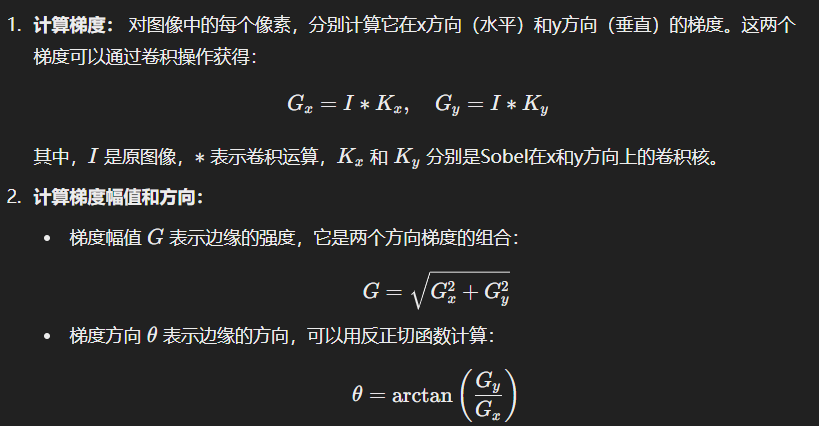
n\left(\frac{G_y}{G_x}\right)
     \]

### 3. Sobel算子在OpenCV中的实现

在OpenCV中，Sobel算子通过函数l Magnitude', sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

#### 参数解释：
- `src`: 输入图像，可以是灰度图像或彩色图像（彩色图像每个通道单独处理）。
- `ddepth`: 输出图像的深度，一般设置为 `cv2.CV_64F`，以便存储负值梯度。
- `dx`: x方向的导数阶数，如果要计算x方向检测是一种更高级的边缘检测方法，结合了噪声抑制、双阈值边缘检测和边缘连接，通常比Sobel算子更稳健，但也更加复杂。

通过使用Sobel算子，我们可以有效地检测图像中的边缘信息。

In [1]:
import cv2
import numpy as np

# 读取灰度图像
img = cv2.imread('data/moon1.jpg', cv2.IMREAD_GRAYSCALE)

# 检查图像是否正确读取
if img is None:
    print("图像读取失败，请检查路径或文件格式。")
else:
    # 计算x方向上的梯度
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # dx=1, dy=0 表示x方向
    # 计算y方向上的梯度
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # dx=0, dy=1 表示y方向

    # 计算梯度幅值
    sobel = cv2.magnitude(sobelx, sobely)

    # 显示结果
    cv2.imshow('Sobel X', sobelx)
    cv2.imshow('Sobel Y', sobely)
    cv2.imshow('Sobel Magnitude', sobel)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


### 4. Sobel算子的优点和缺点

#### 优点：
- **边缘增强效果好**：Sobel算子在边缘检测中可以有效突出图像的边缘，尤其是直线和边界清晰的区域。
- **抗噪性**：相比于简单的差分算子，Sobel算子在计算梯度的同时引入了高斯平滑，能够减少噪声的影响。

#### 缺点：
- **对细微边缘敏感度较差**：虽然Sobel算子能够检测边缘，但对于非常细小的边缘或纹理细节，可能不如Canny算子等更先进的边缘检测算法敏感。
- **计算量大**：Sobel算子的计算相对较复杂，尤其是对于实时应用，计算效率可能需要进一步优化。

### 5. Sobel算子与其他边缘检测算子的比较

- **Prewitt算子**：Prewitt算子与Sobel算子类似，都是基于微分的边缘检测算法。Prewitt算子没有Sobel引入的平滑效果，因此对噪声更加敏感。
- **Laplacian算子**：Laplacian算子是一种二阶导数算子，能够检测图像中梯度变化最明显的地方，但相比Sobel算子，它更加敏感于噪声。
- **Canny算子**：Canny边缘检测是一种更高级的边缘检测方法，结合了噪声抑制、双阈值边缘检测和边缘连接，通常比Sobel算子更稳健，但也更加复杂。

通过使用Sobel算子，我们可以有效地检测图像中的边缘信息。

In [2]:
import cv2
import numpy as np

# 读取灰度图像
img = cv2.imread('data/00001.tiff', cv2.IMREAD_GRAYSCALE)

# 计算x方向上的梯度
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # dx=1, dy=0 表示x方向
# 计算y方向上的梯度
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # dx=0, dy=1 表示y方向

# 计算梯度幅值
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# 计算梯度方向
gradient_direction = np.arctan2(sobely, sobelx)

# 显示结果
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.imshow('Gradient Magnitude', gradient_magnitude)
cv2.imshow('Gradient Direction', gradient_direction) #用来显示梯度方向的图像结果
cv2.waitKey(0)
cv2.destroyAllWindows()


## 图像梯度——Scharr算子


#### 1. Scharr算子概述

Scharr算子是一种用于边缘检测的图像处理算子，它是对Sobel算子的改进。虽然Sobel算子在边缘检测中表现良好，但当卷积核尺寸较小时（如3x3），Sobel算子计算的边缘可能不够精确，尤其是对细微的边缘细节。Scharr算子通过更高的权重系数设计，对图像的边缘细节进行更精确的计算，因此在增强边缘和抑制噪声方面效果更好。

#### 2. Scharr算子的卷积核

Scharr算子使用的卷积核与Sobel类似，但它的核权重设计上有所不同。Scharr算子的卷积核在水平和垂直方向分别定义为：

- **水平方向 (Gx) 卷积核**：
  \[
  G_x = \begin{bmatrix}
  -3 & 0 & 3 \\
  -10 & 0 & 10 \\
  -3 & 0 & 3
  \end{bmatrix}
  \]

- **垂直方向 (Gy) 卷积核**：
  \[
  G_y = \begin{bmatrix}
  -3 & -10 & -3 \\
  0 & 0 & 0 \\
  3 & 10 & 3
  \end{bmatrix}
  \]

可以看出，Scharr算子的卷积核相比Sobel的3x3核，增强了中心像素对整体计算的影响力，使得梯度计算更加精细，特别是对边缘增强更加敏感。

#### 3. Scharr算子与Sobel算子的对比

- **Sobel算子**：是一种广泛使用的边缘检测算子，使用较小的权重进行卷积，适合处理一般的边缘检测任务。
- **Scharr算子**：虽然与Sobel算子一样基于一阶导数，但Scharr算子优化了卷积核中的权重，因此能够更好地检测到图像中的细微边缘，特别是在3x3卷积核情况下，Scharr算子的边缘检测效果优于Sobel算子。

#### 4. Scharr算子的应用

Scharr算子在OpenCV中的使用方式与Sobel算子非常相似，唯一的区别是 `cv2.Scharr()` 替代了 `cv2.Sobel()`。在使用Scharr算子时，OpenCV会自动选择合适的卷积核进行计算，省去了手动指定核大小的步骤。

#### 5. 中，Scharr算子的使用非常简单，通过 `cv2.Scharr()` 函数就可以轻松实现梯度计算。对于需要检测精细边缘的任务，Scharr算子是一个非常好的选择。



In [4]:
import cv2
import numpy as np

# 读取灰度图像
img = cv2.imread('data/00001.tiff', cv2.IMREAD_GRAYSCALE)

# 计算x方向上的梯度
scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)  # dx=1, dy=0 表示x方向
# 计算y方向上的梯度
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)  # dx=0, dy=1 表示y方向

# 计算梯度幅值
gradient_magnitude = np.sqrt(scharr_x**2 + scharr_y**2)

# 将梯度幅值归一化到 0 到 255 的范围
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# 显示结果
cv2.imshow('Scharr X', scharr_x)
cv2.imshow('Scharr Y', scharr_y)
cv2.imshow('Gradient Magnitude', gradient_magnitude)

cv2.waitKey(0)
cv2.destroyAllWindows()


#### 6. 代码讲解

- **`cv2.Scharr()`**：与 `cv2.Sobel()` 类似，用于计算图像的x方向或y方向的梯度，只不过这里使用的是Scharr卷积核。在函数参数中，`dx=1, dy=0` 表示计算x方向梯度，`dx=0, dy=1` 表示计算y方向梯度。
  
- **`np.sqrt(scharr_x**2 + scharr_y**2)`**：计算图像梯度幅值，将x方向和y方向的梯度平方相加后取平方根，得到边缘强度。

- **`cv2.convertScaleAbs()`**：用于将梯度幅值转换为8位的绝对值，方便显示和处理。这一步是因为梯度幅值的值可能为负数或超过255，超出灰度图像的显示范围。

#### 7. Scharr算子效果分析

相比Sobel算子，Scharr算子在处理细节复杂、噪声较少的图像时，能够更好地增强细微边缘特征。因此，在需要对图像进行更加精确的边缘检测时，Scharr算子往往是更优的选择。尤其是在处理高分辨率图像或细节较多的场景时，Scharr算子的表现通常会优于Sobel算子。

#### 8. 总结

Scharr算子是一种对Sobel算子的改进，提供了更精确的边缘检测效果，特别是在使用较小的卷积核（如3x3）时表现尤为出色。在OpenCV中，Scharr算子的使用非常简单，通过 `cv2.Scharr()` 函数就可以轻松实现梯度计算。对于需要检测精细边缘的任务，Scharr算子是一个非常好的选择。



## 图像梯度——Laplacian算子

#### 1. Laplacian算子概述

Laplacian算子是一种常用于图像边缘检测的二阶导数算子。与Sobel和Scharr算子计算图像的一阶导数不同，Laplacian算子直接计算二阶导数，来捕捉图像的变化。二阶导数有助于检测图像中快速变化的区域，也就是边缘。这使得Laplacian算子在检测图像中的锐利边缘时表现非常好。

Laplacian算子基于Laplacian微分运算，其数学表达式为：

\[
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
\]

其中，\(\frac{\partial^2 f}{\partial x^2}\) 和 \(\frac{\partial^2 f}{\partial y^2}\) 分别表示图像在x方向和y方向上的二阶导数。

#### 2. Laplacian算子的卷积核

Laplacian算子的卷积核是对图像像素计算二阶导数的一个离散近似。常用的Laplacian卷积核如下：

\[
\text{Laplacian kernel} = \begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
\]

或者

\[
\text{Laplacian kernel (alternative)} = \begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}
\]

这两个卷积核通过计算像素与其周围像素之间的差异，来捕捉图像中的边缘信息。

#### 3. Laplacian算子的特点

- **边缘检测能力强**：Laplacian算子通过计算二阶导数，可以捕捉到图像中变化最快的区域，即边缘。它能够检测到图像中的细微变化并找到清晰的边缘。
  
- **对噪声敏感**：由于二阶导数放大了图像中的细小变化，Laplacian算子对噪声也较为敏感。在使用Laplacian算子时，通常需要先对图像进行平滑处理（如使用高斯滤波）以减少噪声。

- **无方向性**：与Sobel和Scharr算子不同，Laplacian算子是无方向性的，它会在所有方向上检测边缘，因此无法区分边缘的方向。

#### 4. Laplacian算子的OpenCV实现

在OpenCV中，使用 `cv2.Laplacian()` 函数可以方便地实现Laplacian算子计算。下面是使用Laplacian算子进行边缘检测的示例代码：



In [5]:
import cv2
import numpy as np

# 读取灰度图像
img = cv2.imread('data/moon.jpg', cv2.IMREAD_GRAYSCALE)

# 进行Laplacian算子计算
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# 将结果转换为8位图像
laplacian_abs = cv2.convertScaleAbs(laplacian)

# 显示结果
cv2.imshow('Original Image', img)
cv2.imshow('Laplacian', laplacian_abs)

cv2.waitKey(0)
cv2.destroyAllWindows()


#### 5. 代码讲解

- **`cv2.Laplacian()`**：这个函数用于计算图像的Laplacian梯度。`cv2.CV_64F` 表示输出图像的像素类型为64位浮点型，这样可以避免梯度值出现负数溢出的问题。
  
- **`cv2.convertScaleAbs()`**：将Laplacian算子计算得到的结果转换为8位绝对值图像，方便进行显示。由于Laplacian计算得到的梯度值可能为负值，而图像的灰度值在0-255之间，因此需要进行这种转换。

#### 6. 使用Laplacian算子进行边缘检测

在图像处理中，边缘检测是常见的任务之一，Laplacian算子可以帮助快速找到图像中的边缘信息。由于它是二阶导数，因此能够检测到比一阶导数（如Sobel）更多的细节。为了提高效果，通常在应用Laplacian算子之前，会对图像进行平滑处理，以减少噪声干扰。

可以使用高斯滤波器来平滑图像，减弱噪声的影响。下面是在Laplacian之前使用高斯滤波的例子：

```python
# 对图像进行高斯平滑处理
img_blur = cv2.GaussianBlur(img, (3, 3), 0)

# 计算平滑后图像的Laplacian梯度
laplacian_blur = cv2.Laplacian(img_blur, cv2.CV_64F)
laplacian_blur_abs = cv2.convertScaleAbs(laplacian_blur)

# 显示结果
cv2.imshow('Original Image', img)
cv2.imshow('Laplacian after Gaussian Blur', laplacian_blur_abs)

cv2.waitKey(0)
cv2.destroyAllWindows()
```

#### 7. 总结

Laplacian算子是一种二阶导数算子，能够高效地检测图像中的边缘，通过捕捉图像中亮度变化最快的区域，来检测出图像中的边缘信息。在OpenCV中，`cv2.Laplacian()` 函数可以轻松实现Laplacian算子的应用。

使用Laplacian算子时应注意以下几点：
- 对噪声敏感：通常需要先进行图像平滑处理。
- 无方向性：虽然它可以检测到边缘，但无法判断边缘的方向。

与Sobel和Scharr算子相比，Laplacian算子可以在一些需要高精度边缘检测的应用中提供更为详细的边缘信息。